In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import slide as slideprocess
from slide import *

In [2]:
BASE_DIR = os.path.join(".", "/media/raj/Raj1_5/data")
# BASE_DIR = os.path.join(os.sep, "Volumes", "BigData", "TUPAC")
TRAIN_PREFIX = "TCGA-GBM-"
SRC_TRAIN_DIR = os.path.join(BASE_DIR, "training_slides")
#SRC_TRAIN_DIR = os.path.join(BASE_DIR, "training_image_data")
SRC_TRAIN_EXT = "svs"
DEST_TRAIN_SUFFIX = ""  # Example: "train-"
DEST_TRAIN_EXT = "png"
SCALE_FACTOR = 32
DEST_TRAIN_DIR = os.path.join(BASE_DIR, "training_" + DEST_TRAIN_EXT)
THUMBNAIL_SIZE = 300
THUMBNAIL_EXT = "jpg"

DEST_TRAIN_THUMBNAIL_DIR = os.path.join(BASE_DIR, "training_thumbnail_" + THUMBNAIL_EXT)

FILTER_SUFFIX = ""  # Example: "filter-"
FILTER_RESULT_TEXT = "filtered"
FILTER_DIR = os.path.join(BASE_DIR, "filter_" + DEST_TRAIN_EXT)
FILTER_THUMBNAIL_DIR = os.path.join(BASE_DIR, "filter_thumbnail_" + THUMBNAIL_EXT)
FILTER_PAGINATION_SIZE = 50
FILTER_PAGINATE = True
FILTER_HTML_DIR = BASE_DIR

TILE_SUMMARY_DIR = os.path.join(BASE_DIR, "tile_summary_" + DEST_TRAIN_EXT)
TILE_SUMMARY_ON_ORIGINAL_DIR = os.path.join(BASE_DIR, "tile_summary_on_original_" + DEST_TRAIN_EXT)
TILE_SUMMARY_SUFFIX = "tile_summary"
TILE_SUMMARY_THUMBNAIL_DIR = os.path.join(BASE_DIR, "tile_summary_thumbnail_" + THUMBNAIL_EXT)
TILE_SUMMARY_ON_ORIGINAL_THUMBNAIL_DIR = os.path.join(BASE_DIR, "tile_summary_on_original_thumbnail_" + THUMBNAIL_EXT)
TILE_SUMMARY_PAGINATION_SIZE = 50
TILE_SUMMARY_PAGINATE = True
TILE_SUMMARY_HTML_DIR = BASE_DIR

TILE_DATA_DIR = os.path.join(BASE_DIR, "tile_data")
TILE_DATA_SUFFIX = "tile_data"

TOP_TILES_SUFFIX = "top_tile_summary"
TOP_TILES_DIR = os.path.join(BASE_DIR, TOP_TILES_SUFFIX + "_" + DEST_TRAIN_EXT)
TOP_TILES_THUMBNAIL_DIR = os.path.join(BASE_DIR, TOP_TILES_SUFFIX + "_thumbnail_" + THUMBNAIL_EXT)
TOP_TILES_ON_ORIGINAL_DIR = os.path.join(BASE_DIR, TOP_TILES_SUFFIX + "_on_original_" + DEST_TRAIN_EXT)
TOP_TILES_ON_ORIGINAL_THUMBNAIL_DIR = os.path.join(BASE_DIR,
                                                   TOP_TILES_SUFFIX + "_on_original_thumbnail_" + THUMBNAIL_EXT)

TILE_DIR = os.path.join(BASE_DIR, "tiles_" + DEST_TRAIN_EXT)
TILE_SUFFIX = "tile"

STATS_DIR = os.path.join(BASE_DIR, "svs_stats")

In [4]:
slideprocess.singleprocess_training_slides_to_images()

Opening Slide #1: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-032-TCGA-02-0021-01Z-00-DX1.1cf4eb25-9406-4638-b69c-e9e141930716.svs
got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-032-TCGA-02-0021-01Z-00-DX1.1cf4eb25-9406-4638-b69c-e9e141930716.svs
Saving image to: /media/raj/Raj1_5/data/training_png/TCGA-GBM-001-32x-36001x28953-1125x904.png
Opening Slide #2: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-029-TCGA-02-0007-01A-01-BS1.daf31c78-c900-400a-a63f-b25c53daf160.svs
got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-029-TCGA-02-0007-01A-01-BS1.daf31c78-c900-400a-a63f-b25c53daf160.svs
Saving image to: /media/raj/Raj1_5/data/training_png/TCGA-GBM-002-32x-85895x42764-2684x1336.png
Opening Slide #3: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-017-TCGA-02-0001-01C-01-BS1.0cc8ca55-d024-440c-a4f0-01cf5b3af861.svs
got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-017-TCGA-02-0001-01C-01-BS1.0cc8ca55-d024-440c-a4f0-01cf5b3af8

Saving image to: /media/raj/Raj1_5/data/training_png/TCGA-GBM-023-32x-19975x12691-624x396.png
Opening Slide #24: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-049-TCGA-02-0010-01A-01-TS2.dabc8968-8590-40e9-9916-6bc523a85bb4.svs
got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-049-TCGA-02-0010-01A-01-TS2.dabc8968-8590-40e9-9916-6bc523a85bb4.svs
Saving image to: /media/raj/Raj1_5/data/training_png/TCGA-GBM-024-32x-81900x40437-2559x1263.png
Opening Slide #25: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-054-TCGA-02-0010-01A-01-BS1.37c68e18-09f3-429d-80d9-9f1ffb51ac2e.svs
got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-054-TCGA-02-0010-01A-01-BS1.37c68e18-09f3-429d-80d9-9f1ffb51ac2e.svs
Saving image to: /media/raj/Raj1_5/data/training_png/TCGA-GBM-025-32x-87893x42768-2746x1336.png
Opening Slide #26: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-004-TCGA-02-0001-01Z-00-DX2.b521a862-280c-4251-ab54-5636f20605d0.svs
got openslide open: /media/raj/R

Opening Slide #46: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-034-TCGA-02-0033-01A-01-BS1.325cc830-c031-4c5e-8d18-2d14eea0be9d.svs
got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-034-TCGA-02-0033-01A-01-BS1.325cc830-c031-4c5e-8d18-2d14eea0be9d.svs
Saving image to: /media/raj/Raj1_5/data/training_png/TCGA-GBM-046-32x-79902x35432-2496x1107.png
Opening Slide #47: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-058-TCGA-02-0003-01Z-00-DX3.995C2924-E298-4517-82A4-15806766CE31.svs
got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-058-TCGA-02-0003-01Z-00-DX3.995C2924-E298-4517-82A4-15806766CE31.svs
Saving image to: /media/raj/Raj1_5/data/training_png/TCGA-GBM-047-32x-49799x47673-1556x1489.png
Opening Slide #48: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-047-TCGA-02-0003-01A-01-BS1.0156cf95-2119-4a30-9894-2c0315c954d1.svs
got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-047-TCGA-02-0003-01A-01-BS1.0156cf95-2119-4a30-9894-2c0315

In [5]:
slideprocess.slide_info()


Opening Slide #1: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-032-TCGA-02-0021-01Z-00-DX1.1cf4eb25-9406-4638-b69c-e9e141930716.svs
got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-032-TCGA-02-0021-01Z-00-DX1.1cf4eb25-9406-4638-b69c-e9e141930716.svs
Level count: 3
Level dimensions: ((36001, 28953), (9000, 7238), (2250, 1809))
Level downsamples: (1.0, 4.000124635411869, 16.002709784411277)
Dimensions: (36001, 28953)
Objective power: 20
Associated images:
  label: <PIL.Image.Image image mode=RGBA size=472x456 at 0x7F94A437A240>
  macro: <PIL.Image.Image image mode=RGBA size=1280x431 at 0x7F94A437A1D0>
  thumbnail: <PIL.Image.Image image mode=RGBA size=954x768 at 0x7F94A437A240>
Format: aperio

Opening Slide #2: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-029-TCGA-02-0007-01A-01-BS1.daf31c78-c900-400a-a63f-b25c53daf160.svs
got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-029-TCGA-02-0007-01A-01-BS1.daf31c78-c900-400a-a63f-b25c53daf160.svs
Leve

  macro: <PIL.Image.Image image mode=RGBA size=1600x624 at 0x7F94A44650B8>
  thumbnail: <PIL.Image.Image image mode=RGBA size=841x768 at 0x7F94A4465128>
Format: aperio

Opening Slide #13: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-033-TCGA-02-0024-01Z-00-DX1.d4cec60d-e2b6-41d1-92af-2d24f15b03a9.svs
got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-033-TCGA-02-0024-01Z-00-DX1.d4cec60d-e2b6-41d1-92af-2d24f15b03a9.svs
Level count: 3
Level dimensions: ((26001, 26335), (6500, 6583), (1625, 1645))
Level downsamples: (1.0, 4.000304782715386, 16.00486696282441)
Dimensions: (26001, 26335)
Objective power: 20
Associated images:
  label: <PIL.Image.Image image mode=RGBA size=472x456 at 0x7F94A4465320>
  macro: <PIL.Image.Image image mode=RGBA size=1280x431 at 0x7F94A4465080>
  thumbnail: <PIL.Image.Image image mode=RGBA size=758x768 at 0x7F94A4465320>
Format: aperio

Opening Slide #14: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-027-TCGA-02-0026-01A-01-TS1.7d45400b-00cc

got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-049-TCGA-02-0010-01A-01-TS2.dabc8968-8590-40e9-9916-6bc523a85bb4.svs
Level count: 3
Level dimensions: ((81900, 40437), (20475, 10109), (5118, 2527))
Level downsamples: (1.0, 4.000049460876447, 16.002161648336305)
Dimensions: (81900, 40437)
Objective power: 20
Associated images:
  label: <PIL.Image.Image image mode=RGBA size=470x473 at 0x7F94A43EEF60>
  macro: <PIL.Image.Image image mode=RGBA size=1280x416 at 0x7F94A43EEF60>
  thumbnail: <PIL.Image.Image image mode=RGBA size=1024x505 at 0x7F94A43EEFD0>
Format: aperio

Opening Slide #25: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-054-TCGA-02-0010-01A-01-BS1.37c68e18-09f3-429d-80d9-9f1ffb51ac2e.svs
got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-054-TCGA-02-0010-01A-01-BS1.37c68e18-09f3-429d-80d9-9f1ffb51ac2e.svs
Level count: 4
Level dimensions: ((87893, 42768), (21973, 10692), (5493, 2673), (2746, 1336))
Level downsamples: (1.0, 4.000022755199563

  label: <PIL.Image.Image image mode=RGBA size=472x456 at 0x7F94A438B668>
  macro: <PIL.Image.Image image mode=RGBA size=1280x431 at 0x7F94A438B668>
  thumbnail: <PIL.Image.Image image mode=RGBA size=990x768 at 0x7F94A438B4E0>
Format: aperio

Opening Slide #39: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-024-TCGA-02-0014-01A-01-BS1.c0d26a6a-e351-46c2-bce4-7ea67c1007dd.svs
got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-024-TCGA-02-0014-01A-01-BS1.c0d26a6a-e351-46c2-bce4-7ea67c1007dd.svs
Level count: 3
Level dimensions: ((59927, 29451), (14981, 7362), (3745, 1840))
Level downsamples: (1.0, 4.000303875808569, 16.003923709874037)
Dimensions: (59927, 29451)
Objective power: 20
Associated images:
  label: <PIL.Image.Image image mode=RGBA size=470x473 at 0x7F94A438B4E0>
  macro: <PIL.Image.Image image mode=RGBA size=1280x416 at 0x7F94A438B4E0>
  thumbnail: <PIL.Image.Image image mode=RGBA size=1024x503 at 0x7F94A438B518>
Format: aperio

Opening Slide #40: /media/raj/R

got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-005-TCGA-02-0021-01A-01-TS1.d7321a97-688f-4106-b569-eb2783ee7bbd.svs
Level count: 3
Level dimensions: ((39327, 30394), (9831, 7598), (2457, 1899))
Level downsamples: (1.0, 4.000284192160489, 16.005685467770775)
Dimensions: (39327, 30394)
Objective power: 20
Associated images:
  label: <PIL.Image.Image image mode=RGBA size=470x473 at 0x7F94A438B940>
  macro: <PIL.Image.Image image mode=RGBA size=1280x416 at 0x7F94A438B080>
  thumbnail: <PIL.Image.Image image mode=RGBA size=993x768 at 0x7F94A438B940>
Format: aperio

Opening Slide #53: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-026-TCGA-02-0023-01B-01-TS1.8bce3519-fded-4567-89a7-cc7638a442da.svs
got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-026-TCGA-02-0023-01B-01-TS1.8bce3519-fded-4567-89a7-cc7638a442da.svs
Level count: 3
Level dimensions: ((63922, 41430), (15980, 10357), (3995, 2589))
Level downsamples: (1.0, 4.000159131278682, 16.001409061442

In [6]:
slideprocess.slide_info(display_all_properties=True)


Opening Slide #1: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-032-TCGA-02-0021-01Z-00-DX1.1cf4eb25-9406-4638-b69c-e9e141930716.svs
got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-032-TCGA-02-0021-01Z-00-DX1.1cf4eb25-9406-4638-b69c-e9e141930716.svs
Level count: 3
Level dimensions: ((36001, 28953), (9000, 7238), (2250, 1809))
Level downsamples: (1.0, 4.000124635411869, 16.002709784411277)
Dimensions: (36001, 28953)
Objective power: 20
Associated images:
  label: <PIL.Image.Image image mode=RGBA size=472x456 at 0x7F94A438BB70>
  macro: <PIL.Image.Image image mode=RGBA size=1280x431 at 0x7F94A438BC18>
  thumbnail: <PIL.Image.Image image mode=RGBA size=954x768 at 0x7F94A438BBE0>
Format: aperio
Properties:
  Property: aperio.AppMag, value: 20
  Property: aperio.DSR ID, value: AP1258-DSR
  Property: aperio.Date, value: 01/20/09
  Property: aperio.Filename, value: 7542
  Property: aperio.Filtered, value: 5
  Property: aperio.ICC Profile, value: ScanScope v1
  Property:

  thumbnail: <PIL.Image.Image image mode=RGBA size=1024x607 at 0x7F94A44652B0>
Format: aperio
Properties:
  Property: aperio.AppMag, value: 20
  Property: aperio.DSR ID, value: AP1258-DSR
  Property: aperio.Date, value: 01/21/09
  Property: aperio.Filename, value: 7569
  Property: aperio.Filtered, value: 5
  Property: aperio.ICC Profile, value: ScanScope v1
  Property: aperio.ImageID, value: 7569
  Property: aperio.Left, value: 18.343998
  Property: aperio.LineAreaXOffset, value: 0.021368
  Property: aperio.LineAreaYOffset, value: -0.005374
  Property: aperio.LineCameraSkew, value: -0.000389
  Property: aperio.MPP, value: 0.5015
  Property: aperio.OriginalWidth, value: 69360
  Property: aperio.Originalheight, value: 40459
  Property: aperio.ScanScope ID, value: SS1302
  Property: aperio.StripeWidth, value: 2040
  Property: aperio.Time, value: 15:25:16
  Property: aperio.Title, value: none
  Property: aperio.Top, value: 21.885571
  Property: aperio.User, value: d7f93a12-41d0-44e0-b08e-c

got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-012-TCGA-02-0025-01A-01-BS1.c97b92ed-147a-4676-8cbe-d1f3cb585372.svs
Level count: 3
Level dimensions: ((65919, 42884), (16479, 10721), (4119, 2680))
Level downsamples: (1.0, 4.000091024940834, 16.002567098955332)
Dimensions: (65919, 42884)
Objective power: 20
Associated images:
  label: <PIL.Image.Image image mode=RGBA size=470x473 at 0x7F94A44652E8>
  macro: <PIL.Image.Image image mode=RGBA size=1280x416 at 0x7F94A44652E8>
  thumbnail: <PIL.Image.Image image mode=RGBA size=1024x666 at 0x7F94A4465208>
Format: aperio
Properties:
  Property: aperio.AppMag, value: 20
  Property: aperio.DSR ID, value: ap1258-dsr
  Property: aperio.Date, value: 01/14/08
  Property: aperio.Filename, value: 2674
  Property: aperio.ImageID, value: 2674
  Property: aperio.Left, value: 15.054410
  Property: aperio.LineAreaXOffset, value: 0.012096
  Property: aperio.LineAreaYOffset, value: -0.021773
  Property: aperio.LineCameraSkew, value: 0.000

got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-033-TCGA-02-0024-01Z-00-DX1.d4cec60d-e2b6-41d1-92af-2d24f15b03a9.svs
Level count: 3
Level dimensions: ((26001, 26335), (6500, 6583), (1625, 1645))
Level downsamples: (1.0, 4.000304782715386, 16.00486696282441)
Dimensions: (26001, 26335)
Objective power: 20
Associated images:
  label: <PIL.Image.Image image mode=RGBA size=472x456 at 0x7F94A437A898>
  macro: <PIL.Image.Image image mode=RGBA size=1280x431 at 0x7F94A437A940>
  thumbnail: <PIL.Image.Image image mode=RGBA size=758x768 at 0x7F94A437A898>
Format: aperio
Properties:
  Property: aperio.AppMag, value: 20
  Property: aperio.DSR ID, value: AP1258-DSR
  Property: aperio.Date, value: 01/20/09
  Property: aperio.Filename, value: 7510
  Property: aperio.Filtered, value: 5
  Property: aperio.ICC Profile, value: ScanScope v1
  Property: aperio.ImageID, value: 7510
  Property: aperio.Left, value: 25.321415
  Property: aperio.LineAreaXOffset, value: 0.021368
  Property: ap


Opening Slide #18: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-045-TCGA-02-0010-01Z-00-DX1.b53f8c4e-6e10-4684-b7fc-fd9e0b9d6c01.svs
got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-045-TCGA-02-0010-01Z-00-DX1.b53f8c4e-6e10-4684-b7fc-fd9e0b9d6c01.svs
Level count: 3
Level dimensions: ((36001, 25891), (9000, 6472), (2250, 1618))
Level downsamples: (1.0, 4.0002873231698945, 16.001149292679578)
Dimensions: (36001, 25891)
Objective power: 20
Associated images:
  label: <PIL.Image.Image image mode=RGBA size=472x456 at 0x7F94A437A1D0>
  macro: <PIL.Image.Image image mode=RGBA size=1280x431 at 0x7F94A437AA90>
  thumbnail: <PIL.Image.Image image mode=RGBA size=1024x736 at 0x7F94A437A1D0>
Format: aperio
Properties:
  Property: aperio.AppMag, value: 20
  Property: aperio.DSR ID, value: AP1258-DSR
  Property: aperio.Date, value: 01/20/09
  Property: aperio.Filename, value: 7541
  Property: aperio.Filtered, value: 5
  Property: aperio.ICC Profile, value: ScanScope v1
  Proper

got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-043-TCGA-02-0023-01Z-00-DX1.69f7c0c4-ff59-4100-94c3-86b7bf2c27c8.svs
Level count: 3
Level dimensions: ((32612, 27027), (8153, 6756), (2038, 1689))
Level downsamples: (1.0, 4.000222024866785, 16.00186945373603)
Dimensions: (32612, 27027)
Objective power: 20
Associated images:
  label: <PIL.Image.Image image mode=RGBA size=470x473 at 0x7F94A437A470>
  macro: <PIL.Image.Image image mode=RGBA size=1280x416 at 0x7F94A437AA90>
  thumbnail: <PIL.Image.Image image mode=RGBA size=926x768 at 0x7F94A437A470>
Format: aperio
Properties:
  Property: aperio.AppMag, value: 20
  Property: aperio.DSR ID, value: ap1258-dsr
  Property: aperio.Date, value: 05/15/08
  Property: aperio.Filename, value: 4419
  Property: aperio.Filtered, value: 5
  Property: aperio.ICC Profile, value: ScanScope v1
  Property: aperio.ImageID, value: 4419
  Property: aperio.Left, value: 39.168331
  Property: aperio.LineAreaXOffset, value: 0.000000
  Property: ap

  thumbnail: <PIL.Image.Image image mode=RGBA size=991x768 at 0x7F94A438BAC8>
Format: aperio
Properties:
  Property: aperio.AppMag, value: 20
  Property: aperio.DSR ID, value: AP1258-DSR
  Property: aperio.Date, value: 01/22/09
  Property: aperio.Filename, value: 7571
  Property: aperio.Filtered, value: 5
  Property: aperio.ICC Profile, value: ScanScope v1
  Property: aperio.ImageID, value: 7571
  Property: aperio.Left, value: 24.758553
  Property: aperio.LineAreaXOffset, value: 0.021368
  Property: aperio.LineAreaYOffset, value: -0.005374
  Property: aperio.LineCameraSkew, value: -0.000389
  Property: aperio.MPP, value: 0.5015
  Property: aperio.OriginalWidth, value: 55080
  Property: aperio.Originalheight, value: 41931
  Property: aperio.ScanScope ID, value: SS1302
  Property: aperio.StripeWidth, value: 2040
  Property: aperio.Time, value: 08:48:18
  Property: aperio.Title, value: none
  Property: aperio.Top, value: 21.862225
  Property: aperio.User, value: 1aa0eb01-efc1-4da4-8a7f-29

  label: <PIL.Image.Image image mode=RGBA size=470x473 at 0x7F94A438BA90>
  macro: <PIL.Image.Image image mode=RGBA size=1280x416 at 0x7F94A438BA90>
  thumbnail: <PIL.Image.Image image mode=RGBA size=1024x456 at 0x7F94A438B128>
Format: aperio
Properties:
  Property: aperio.AppMag, value: 20
  Property: aperio.DSR ID, value: ap1258-dsr
  Property: aperio.Date, value: 01/09/08
  Property: aperio.Filename, value: 2339
  Property: aperio.ImageID, value: 2339
  Property: aperio.Left, value: 12.227448
  Property: aperio.LineAreaXOffset, value: 0.012096
  Property: aperio.LineAreaYOffset, value: -0.021773
  Property: aperio.LineCameraSkew, value: 0.000989
  Property: aperio.MPP, value: 0.5001
  Property: aperio.OriginalWidth, value: 97920
  Property: aperio.Originalheight, value: 42829
  Property: aperio.ScanScope ID, value: SS1258
  Property: aperio.StripeWidth, value: 2034
  Property: aperio.Time, value: 07:59:04
  Property: aperio.Title, value: none
  Property: aperio.Top, value: 21.878080

  macro: <PIL.Image.Image image mode=RGBA size=1280x416 at 0x7F94A438BA20>
  thumbnail: <PIL.Image.Image image mode=RGBA size=1024x582 at 0x7F94A438B9B0>
Format: aperio
Properties:
  Property: aperio.AppMag, value: 20
  Property: aperio.DSR ID, value: ap1258-dsr
  Property: aperio.Date, value: 01/16/08
  Property: aperio.Filename, value: 2850
  Property: aperio.ImageID, value: 2850
  Property: aperio.Left, value: 19.377930
  Property: aperio.LineAreaXOffset, value: 0.012096
  Property: aperio.LineAreaYOffset, value: -0.021773
  Property: aperio.LineCameraSkew, value: 0.000989
  Property: aperio.MPP, value: 0.5001
  Property: aperio.OriginalWidth, value: 65280
  Property: aperio.Originalheight, value: 36415
  Property: aperio.ScanScope ID, value: SS1258
  Property: aperio.StripeWidth, value: 2034
  Property: aperio.Time, value: 13:10:10
  Property: aperio.Title, value: none
  Property: aperio.Top, value: 21.374817
  Property: aperio.User, value: 62baa7db-05d2-4095-af72-360247869bf9
  Pr

got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-044-TCGA-02-0006-01Z-00-DX1.a37df719-8b93-4245-ae49-67eb1114253a.svs
Level count: 3
Level dimensions: ((40001, 31019), (10000, 7754), (2500, 1938))
Level downsamples: (1.0, 4.000243448542688, 16.00303797729618)
Dimensions: (40001, 31019)
Objective power: 20
Associated images:
  label: <PIL.Image.Image image mode=RGBA size=472x456 at 0x7F94A438B908>
  macro: <PIL.Image.Image image mode=RGBA size=1280x431 at 0x7F94A438B908>
  thumbnail: <PIL.Image.Image image mode=RGBA size=990x768 at 0x7F94A438B898>
Format: aperio
Properties:
  Property: aperio.AppMag, value: 20
  Property: aperio.DSR ID, value: AP1258-DSR
  Property: aperio.Date, value: 01/20/09
  Property: aperio.Filename, value: 7538
  Property: aperio.Filtered, value: 5
  Property: aperio.ICC Profile, value: ScanScope v1
  Property: aperio.ImageID, value: 7538
  Property: aperio.Left, value: 23.085964
  Property: aperio.LineAreaXOffset, value: 0.021368
  Property: a

got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-022-TCGA-02-0015-01B-01-TS1.681cbdeb-048c-4838-b25f-a7dc2bdb86e4.svs
Level count: 3
Level dimensions: ((53934, 16596), (13483, 4149), (3370, 1037))
Level downsamples: (1.0, 4.000074167470148, 16.004005791643895)
Dimensions: (53934, 16596)
Objective power: 20
Associated images:
  label: <PIL.Image.Image image mode=RGBA size=470x473 at 0x7F94A438B208>
  macro: <PIL.Image.Image image mode=RGBA size=1280x416 at 0x7F94A438B208>
  thumbnail: <PIL.Image.Image image mode=RGBA size=1024x315 at 0x7F94A438B240>
Format: aperio
Properties:
  Property: aperio.AppMag, value: 20
  Property: aperio.DSR ID, value: ap1258-dsr
  Property: aperio.Date, value: 01/11/08
  Property: aperio.Filename, value: 2662
  Property: aperio.ImageID, value: 2662
  Property: aperio.Left, value: 15.050945
  Property: aperio.LineAreaXOffset, value: 0.012096
  Property: aperio.LineAreaYOffset, value: -0.021773
  Property: aperio.LineCameraSkew, value: 0.0009

  macro: <PIL.Image.Image image mode=RGBA size=1280x416 at 0x7F94A437A2B0>
  thumbnail: <PIL.Image.Image image mode=RGBA size=1024x454 at 0x7F94A437A898>
Format: aperio
Properties:
  Property: aperio.AppMag, value: 20
  Property: aperio.DSR ID, value: ap1258-dsr
  Property: aperio.Date, value: 01/16/08
  Property: aperio.Filename, value: 2852
  Property: aperio.ImageID, value: 2852
  Property: aperio.Left, value: 16.437755
  Property: aperio.LineAreaXOffset, value: 0.012096
  Property: aperio.LineAreaYOffset, value: -0.021773
  Property: aperio.LineCameraSkew, value: 0.000989
  Property: aperio.MPP, value: 0.5001
  Property: aperio.OriginalWidth, value: 81600
  Property: aperio.Originalheight, value: 35482
  Property: aperio.ScanScope ID, value: SS1258
  Property: aperio.StripeWidth, value: 2034
  Property: aperio.Time, value: 13:40:29
  Property: aperio.Title, value: none
  Property: aperio.Top, value: 20.428606
  Property: aperio.User, value: 62baa7db-05d2-4095-af72-360247869bf9
  Pr

got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-046-TCGA-02-0014-01Z-00-DX1.b7fd5196-fc51-4dc7-aa6d-e74e1e9ee71d.svs
Level count: 3
Level dimensions: ((77695, 20687), (19423, 5171), (4855, 1292))
Level downsamples: (1.0, 4.0003673073169645, 16.00734975273648)
Dimensions: (77695, 20687)
Objective power: 20
Associated images:
  label: <PIL.Image.Image image mode=RGBA size=470x473 at 0x7F94A437A358>
  macro: <PIL.Image.Image image mode=RGBA size=1280x416 at 0x7F94A437A710>
  thumbnail: <PIL.Image.Image image mode=RGBA size=1024x272 at 0x7F94A437A2B0>
Format: aperio
Properties:
  Property: aperio.AppMag, value: 20
  Property: aperio.DSR ID, value: ap1258-dsr
  Property: aperio.Date, value: 05/15/08
  Property: aperio.Filename, value: 4418
  Property: aperio.Filtered, value: 5
  Property: aperio.ICC Profile, value: ScanScope v1
  Property: aperio.ImageID, value: 4418
  Property: aperio.Left, value: 16.045910
  Property: aperio.LineAreaXOffset, value: 0.000000
  Property:

  thumbnail: <PIL.Image.Image image mode=RGBA size=1024x663 at 0x7F94A44652E8>
Format: aperio
Properties:
  Property: aperio.AppMag, value: 20
  Property: aperio.DSR ID, value: ap1258-dsr
  Property: aperio.Date, value: 01/11/08
  Property: aperio.Filename, value: 2669
  Property: aperio.ImageID, value: 2669
  Property: aperio.Left, value: 15.053673
  Property: aperio.LineAreaXOffset, value: 0.012096
  Property: aperio.LineAreaYOffset, value: -0.021773
  Property: aperio.LineCameraSkew, value: 0.000989
  Property: aperio.MPP, value: 0.5001
  Property: aperio.OriginalWidth, value: 65280
  Property: aperio.Originalheight, value: 41480
  Property: aperio.ScanScope ID, value: SS1258
  Property: aperio.StripeWidth, value: 2034
  Property: aperio.Time, value: 14:49:07
  Property: aperio.Title, value: none
  Property: aperio.Top, value: 22.482675
  Property: aperio.User, value: 7f4f719a-aa15-40ea-920b-aee5b1edac78
  Property: openslide.comment, value: Aperio Image Library v8.2.43
65280x41480 

  macro: <PIL.Image.Image image mode=RGBA size=1280x416 at 0x7F94A44652B0>
  thumbnail: <PIL.Image.Image image mode=RGBA size=1024x557 at 0x7F94A4465320>
Format: aperio
Properties:
  Property: aperio.AppMag, value: 20
  Property: aperio.DSR ID, value: ap1258-dsr
  Property: aperio.Date, value: 01/14/08
  Property: aperio.Filename, value: 2671
  Property: aperio.ImageID, value: 2671
  Property: aperio.Left, value: 20.432166
  Property: aperio.LineAreaXOffset, value: 0.012096
  Property: aperio.LineAreaYOffset, value: -0.021773
  Property: aperio.LineCameraSkew, value: 0.000989
  Property: aperio.MPP, value: 0.5001
  Property: aperio.OriginalWidth, value: 67320
  Property: aperio.Originalheight, value: 35936
  Property: aperio.ScanScope ID, value: SS1258
  Property: aperio.StripeWidth, value: 2034
  Property: aperio.Time, value: 05:34:24
  Property: aperio.Title, value: none
  Property: aperio.Top, value: 22.372545
  Property: aperio.User, value: a0092174-b177-4951-9d13-364d96b5c0be
  Pr

Opening Slide #1: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-032-TCGA-02-0021-01Z-00-DX1.1cf4eb25-9406-4638-b69c-e9e141930716.svs
got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-032-TCGA-02-0021-01Z-00-DX1.1cf4eb25-9406-4638-b69c-e9e141930716.svs
  Dimensions: 36,001 x 28,953
Opening Slide #2: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-029-TCGA-02-0007-01A-01-BS1.daf31c78-c900-400a-a63f-b25c53daf160.svs
got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-029-TCGA-02-0007-01A-01-BS1.daf31c78-c900-400a-a63f-b25c53daf160.svs
  Dimensions: 85,895 x 42,764
Opening Slide #3: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-017-TCGA-02-0001-01C-01-BS1.0cc8ca55-d024-440c-a4f0-01cf5b3af861.svs
got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-017-TCGA-02-0001-01C-01-BS1.0cc8ca55-d024-440c-a4f0-01cf5b3af861.svs
  Dimensions: 89,890 x 29,684
Opening Slide #4: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-013-TCGA-02-0025-01Z-00-DX2.

got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-011-TCGA-02-0011-01B-01-TS1.e0250635-3446-4c9e-a271-ac25428fc090.svs
  Dimensions: 27,965 x 19,190
Opening Slide #36: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-056-TCGA-02-0011-01B-01-BS1.90348ecd-40b3-477c-8888-076f5f8f8a98.svs
got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-056-TCGA-02-0011-01B-01-BS1.90348ecd-40b3-477c-8888-076f5f8f8a98.svs
  Dimensions: 75,907 x 25,348
Opening Slide #37: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-036-TCGA-02-0027-01A-01-TS1.f7418da1-4691-4dd3-acb0-8fc3e4d737da.svs
got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-036-TCGA-02-0027-01A-01-TS1.f7418da1-4691-4dd3-acb0-8fc3e4d737da.svs
  Dimensions: 82,491 x 44,547
Opening Slide #38: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-044-TCGA-02-0006-01Z-00-DX1.a37df719-8b93-4245-ae49-67eb1114253a.svs
got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-044-TCGA-02-0006-01Z-00

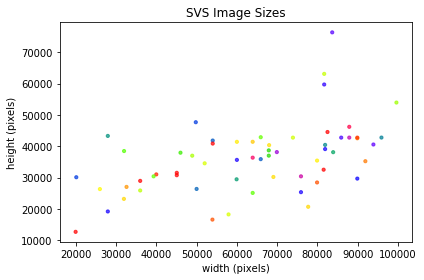

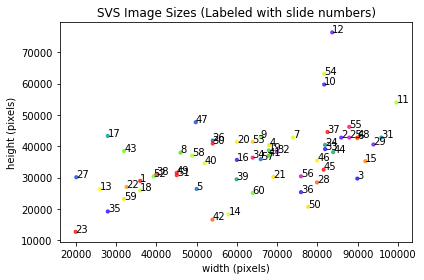

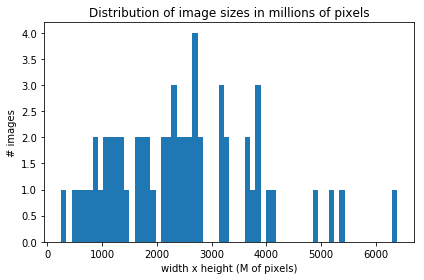

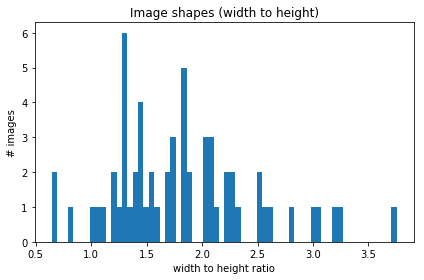

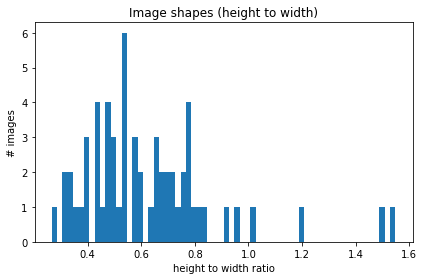

In [7]:
slide_stats()

In [10]:
slideprocess.training_slide_to_image(4)
img_path = slideprocess.get_training_image_path(4)
img = slideprocess.open_image(img_path)
img.show()

Opening Slide #4: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-013-TCGA-02-0025-01Z-00-DX2.aa8923a0-2930-47f4-bbff-ceb080fafc9e.svs
got openslide open: /media/raj/Raj1_5/data/training_slides/TCGA-GBM-013-TCGA-02-0025-01Z-00-DX2.aa8923a0-2930-47f4-bbff-ceb080fafc9e.svs
Saving image to: /media/raj/Raj1_5/data/training_png/TCGA-GBM-004-32x-68003x40359-2125x1261.png


In [13]:
!ls

filter.py		  slide_old.py		tiles.py  wip_docs
gbmtissue_identifi.ipynb  slide.py		util.py
__pycache__		  spixel_kitware.ipynb	util.pyc


In [14]:
import util as utilities

In [16]:
img_path = slideprocess.get_training_image_path(2)
img = slideprocess.open_image(img_path)

In [17]:
rgb=utilities.pil_to_np_rgb(img)

RGB                  | Time: 0:00:00.147822  Type: uint8   Shape: (1336, 2684, 3)


In [21]:
utilities.display_img(rgb)

In [27]:
import math
import multiprocessing
import numpy as np
import os
import scipy.ndimage.morphology as sc_morph
import skimage.color as sk_color
import skimage.exposure as sk_exposure
import skimage.feature as sk_feature
import skimage.filters as sk_filters
import skimage.future as sk_future
import skimage.morphology as sk_morphology
import skimage.segmentation as sk_segmentation

In [25]:
import scipy.ndimage.morphology as sc_morph

In [26]:
!pip install scikit-image

    100% |████████████████████████████████| 25.3MB 1.5MB/s eta 0:00:01


In [43]:
import filter as filters

In [46]:
grayscale = filters.filter_rgb_to_grayscale(rgb)

NameError: name 'Time' is not defined

In [45]:
from util import Time